<a href="https://colab.research.google.com/github/POS-Cross/Bravo-EDA/blob/main/aporir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Concepts of Apriori](#scrollTo=m2ea3YO3cb8L)

>[Loading and preprocessing data](#scrollTo=L0p1E387fqyH)

>[Take only customers with Bravo Card](#scrollTo=6GvEwThedfKs)

>[Put the dataframe in the foramt](#scrollTo=huXJR50aENUB)

>[Apply Apriori Algorith](#scrollTo=wtrgKr-id5sA)

>>[Our data is in the correct format to be fed to the apriori class of the Apyori library. The apriori class requires some additional parameters to work.](#scrollTo=wtrgKr-id5sA)

>>[Create deployemnet file](#scrollTo=Gk4LN6oSiys8)



#**Concepts of Apriori**

---

*   **Support**: Fraction of transactions that contain an itemset
*   **Confidence**: Measures how often items in Y appear in transactions that contain X
* **Frequent itemset**: An itemset whose support is greater than or equal to a minSup threshold
Support refers to the default popularity of an item and can be calculated by finding the number of transactions containing a particular item divided by the total number of transactions.

Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by the total number of transactions where A is bought.

Lift refers to the increase in the ratio of sale of a product B when another product A is sold. `Lift(A –> B)` can be calculated by dividing Confidence(A -> B) by Support(B).

For large sets of data, there can be hundreds of items in hundreds of thousands of transactions. The Apriori algorithm tries to extract rules for each possible combination of items. We can set minimum levels of support, confidence or lift to be reached to count something as a “good rule”. The algorithm will then only return these rules fitting our requirements.


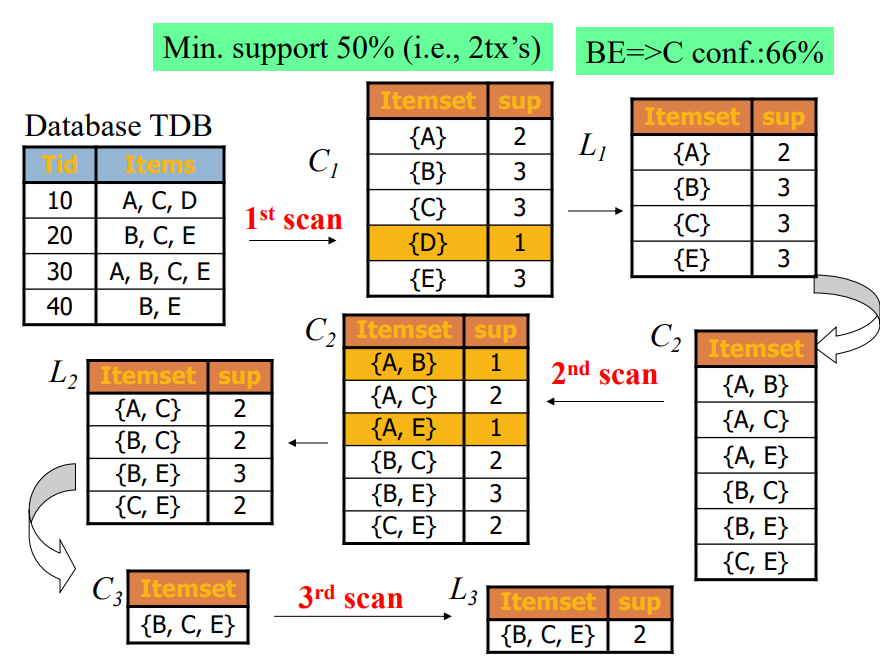

[Ref: https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6](https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6)

In [ ]:
pip install apyori

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pickle

# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#f2a553', '#d96548', '#c14953','#86c1b2','#98e2c6','#f3c969']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

CSV = "http://ec2-3-128-207-73.us-east-2.compute.amazonaws.com:8002/uploads/uploads/2021/9/20/19e5badc-19f3-11ec-b8c6-09d958cd918a.csv"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


#Loading and preprocessing data


In [ ]:

df_items=pd.read_csv(CSV)
df_items

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260.0,104,804,0,0
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540.0,107,804,0,0
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470.0,112,804,0,0
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520.0,112,804,0,0
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024.0,108,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590.0,108,847,1,628959


In [ ]:
df_clean= df_items.dropna()
df_clean.shape[0]

3481789

In [ ]:
indexNames = df_clean.loc[(df_clean['Total_Net_InvoiceIncVAT']<0) | (df_clean['TotalBeforeDisc']< 0) | (df_clean['DiscValue'] < 0) | (df_clean['NetSales_IncVAT']<0)].index
df_minus= df_clean.loc[indexNames]
df_minus.describe()
num = df_minus.dTicketInternalKey.count()
sum = df_minus.NetSales_IncVAT.sum()
print('The count of transactions number for minus vlaues = ', num)
print('The sum of transactions values for minus vlaues = ', sum)

The count of transactions number for minus vlaues =  8556
The sum of transactions values for minus vlaues =  -106302.82


In [ ]:
# # Get names of indexes for which column Total_Net_InvoiceIncVAT has value less than 0
indexNames = df_clean.loc[(df_clean['Total_Net_InvoiceIncVAT']<=0) | (df_clean['TotalBeforeDisc']<= 0) | (df_clean['DiscValue'] <= 0) | (df_clean['Quantity']<= 0)].index

# Delete these row indexes from dataFrame
df_clean.drop(indexNames , inplace=True )
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.80,-1,13369,103260.0,104,804,0,0
10,30860304,1,01/09/2019 0:00:00,11.00,2,50204,68248,6253501790497,Ghadeer Water 12*500M Case,11.0,1.00,11.00,1.00,10.00,12.00,-1,15193,102550.0,112,804,0,0
21,30860310,1,01/09/2019 0:00:00,27.00,2,50210,63361,9555127903815,Royal Classic Butter Cookies 908G,27.0,1.00,27.00,2.00,25.00,35.25,-1,13014,102570.0,112,804,0,0
31,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56302,72989425,Ben &Jerry Brouns Chocolate 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405.0,106,804,0,0
32,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56306,72986455,Ben &Jerry New Yourk Ice Cream 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405.0,106,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.90,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.90,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.90,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.90,-1,15482,101590.0,108,847,1,628959


# Take only customers with Bravo Card

In [ ]:
df_customers =df_clean[df_clean.CustomerGroup == 1]

We only care about two features: BillNo and ItemName

In [ ]:
df_customers =df_customers[['BillNo', 'ItemName']]
df_customers

,BillNo,ItemName
6389,76481,Pan Pro V Smooth& Sleek400Ml
6390,76481,Osem Zaatar Snack Cracker 300G
6392,76481,Pam Wipes 12*64
6393,76481,Carefree Plus Large Fresh 48Psc
6395,76481,Selpak Toilet Paper 32 Roll
...,...,...
3481787,38929,Peanut Butter Ruparels Red 510G
3481788,38929,Jericho Water 8*1.5L Case
3481789,38929,Alaa Al Deen Tissues 800G 2P
3481790,38929,Reema Toilet 32 Roll


# Put the dataframe in the foramt
list of lists [[],[],[],....]

In [ ]:
store_data  = df_customers.groupby('BillNo').ItemName.apply(list).reset_index()

In [ ]:
import numpy as np
import pandas as pd
from apyori import apriori
import pickle

In [ ]:

# Converting our dataframe into a list of lists for Apriori algorithm
records = []
for items in store_data .ItemName:
  records.append(items)

records  

[['Safi Sunflower Oil 5L                   ',
  'Siniora Luncheon Meat 800 Gr            ',
  'Theo Shower Gel Red Hot 3L              ',
  'Abu Eta Noodles 200G                    ',
  'Ali Baba Box 24Psc                      '],
 ['Siniora Luncheon Meat 800 Gr            ',
  'Pringles Barbecue 18*165Gr              ',
  'Voortman Cranberry Flax Seed 350G       ',
  'Pringles Hot & Spicy 18*165Gr           ',
  'Mcvities Hobnobs Milk Chocolate 300G    '],
 ['Carefree Breathable Fresh 58Pcs         ',
  'Bisly Pizza 200G                        ',
  'Balloons Baby Cotton Tips 56            ',
  'Al Sanabel Wheat Flour 1K               ',
  'Cleanic Make Up Remover Cutton50 Pcs Pu ',
  'Cleanic Cotton Buds 200Pcs +100 Free    ',
  'Oreo Golden Bisc 44G*16                 ',
  'Reema750*2                              '],
 ['Wc Masteer Bath Stone Flower            ',
  'Wc Masteer Bath Stone Mint              ',
  'Bono General Freshener Oud 700Ml        ',
  'Bono General Freshener Viole

In [ ]:
df_bills = pd.DataFrame(records)
df_bills.to_csv('store_data_b.csv')

# Apply Apriori Algorith


---


Our data is in the correct format to be fed to the apriori class of the Apyori library. The apriori class requires some additional parameters to work.
---
*   **records**: our data in list of lists format
*   **min_support**: minimum support values required for every association rule
*   **min_confidence**: minimum confidence value required for every association rule

*   **min_lift**: minimum lift value required for every association rule
*   **max_length**: maximum number of items you want per rule
*   We use min_support = 0.0045, min_confidence = 0.2, min_lift = 2, max_length = 5, which we found after some trial and error. Now let’s call apriori:



In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=2, max_length=5)
association_results = list(association_rules)


In [ ]:
association_results

[RelationRecord(items=frozenset({'Abu Eta Noodles 200G                    ', 'Safi Sunflower Oil 5L                   '}), support=0.010260940472954607, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Abu Eta Noodles 200G                    '}), items_add=frozenset({'Safi Sunflower Oil 5L                   '}), confidence=0.30280748663101603, lift=2.8929549707392543)]),
 RelationRecord(items=frozenset({'Safi Sunflower Oil 5L                   ', 'Addyafe Basmati Rice 5K                 '}), support=0.015153574340853493, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Addyafe Basmati Rice 5K                 '}), items_add=frozenset({'Safi Sunflower Oil 5L                   '}), confidence=0.26813627254509015, lift=2.5617139494309975)]),
 RelationRecord(items=frozenset({'Aden Tomato Past 400G                   ', 'Safi Sunflower Oil 5L                   '}), support=0.00530035335689046, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Aden Tomato Past 4

In [ ]:
# First index of the inner list contains base item and add item
for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    to_print = "Rule: "

    arrow = " -> "
    for i in range(len(items)):
        to_print += str(items[i]) + arrow

    print(to_print)
    # Print the support for this association rule
    print("Support: " + str(item[1]))
    # Print the confidence and lift for this association rule
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Abu Eta Noodles 200G                     -> Safi Sunflower Oil 5L                    -> 
Support: 0.010260940472954607
Confidence: 0.30280748663101603
Lift: 2.8929549707392543
Rule: Safi Sunflower Oil 5L                    -> Addyafe Basmati Rice 5K                  -> 
Support: 0.015153574340853493
Confidence: 0.26813627254509015
Lift: 2.5617139494309975
Rule: Aden Tomato Past 400G                    -> Safi Sunflower Oil 5L                    -> 
Support: 0.00530035335689046
Confidence: 0.26773455377574373
Lift: 2.5578760181976916
Rule: Al Jebrini Long Life Milk 1L             -> Safi Sunflower Oil 5L                    -> 
Support: 0.011008426202772493
Confidence: 0.21204188481675396
Lift: 2.025800720815852
Rule: Safi Sunflower Oil 5L                    -> Al Kasih Tomato Paste 135G               -> 
Support: 0.005730723928603788
Confidence: 0.2227112676056338
Lift: 2.1277336165880807
Rule: Al Sanabel Wheat Flour 1K                -> Safi Sunflower Oil 5L                    ->

In [ ]:
df_shape = store_data.shape
n_of_transactions = df_shape[0]
n_of_products = df_shape[1]
# Converting our dataframe into a list of lists for Apriori algorithm
records = []
for i in range(0, n_of_transactions):
    records.append([])
    for j in range(0, n_of_products):
        if (str(store_data.values[i,j]) != 'nan'):
            records[i].append(str(store_data.values[i,j]))
        else :
            Continue

In [ ]:
store_data.shape[0]

44148

In [ ]:
# First merge all the columns of the data frame to a data series object

merged =store_data.loc[0]

for i in range(1,n_of_products):
    print(store_data.loc[i])
    merged = merged.append(store_data.iloc[i])

# Then rank all the unique products

ranking = merged.value_counts(ascending=False)

# Extract the products in order without their respective count

ranked_products = list(ranking.index)

BillNo                                                      4
ItemName    [Siniora Luncheon Meat 800 Gr            , Pri...
Name: 1, dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:842: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  keys, counts = f(values, dropna)


In [ ]:
lookup_table = {}

for item in association_results:
    # First index of the inner list contains base item and add item

    pair = item[0] 

    items = [x for x in pair]

    to_print = "Rule: "

    arrow = " -> "

    for i in range(len(items)):

        to_print += str(items[i]) + arrow        

    # If we do not have 3 recommendations for our base product we will

    # suggest top ranked products in addition

    if len(items) < 4:

        items_to_append = items

        i = 0

        while len(items) < 4:

            if ranked_products[i] not in items:

                items_to_append.append(ranked_products[i])

            i += 1

    # Add the items to db, with base product separately from the products 

    # that are to be recommended
    #print(items_to_append[0])
    print(items_to_append[1:])
    #Lookup_table[items_to_append[0]] = items_to_append[1:]

    print(to_print)

    # Print the support for this association rule

    print("Support: " + str(item[1]))

    # Print the confidence and lift for this association rule

    print("Confidence: " + str(item[2][0][2]))

    print("Lift: " + str(item[2][0][3]))

    print("=====================================")
    #lookup_table['default_recommendation'] = ranked_products[:3]

['Safi Sunflower Oil 5L                   ', ['Safi Sunflower Oil 5L                   ', 'Siniora Luncheon Meat 800 Gr            ', 'Theo Shower Gel Red Hot 3L              ', 'Abu Eta Noodles 200G                    ', 'Ali Baba Box 24Psc                      '], ['Siniora Luncheon Meat 800 Gr            ', 'Pringles Barbecue 18*165Gr              ', 'Voortman Cranberry Flax Seed 350G       ', 'Pringles Hot & Spicy 18*165Gr           ', 'Mcvities Hobnobs Milk Chocolate 300G    ']]
Rule: Abu Eta Noodles 200G                     -> Safi Sunflower Oil 5L                    -> 
Support: 0.010260940472954607
Confidence: 0.30280748663101603
Lift: 2.8929549707392543
['Addyafe Basmati Rice 5K                 ', ['Safi Sunflower Oil 5L                   ', 'Siniora Luncheon Meat 800 Gr            ', 'Theo Shower Gel Red Hot 3L              ', 'Abu Eta Noodles 200G                    ', 'Ali Baba Box 24Psc                      '], ['Siniora Luncheon Meat 800 Gr            ', 'Pringles Barbecu

In [ ]:
lookup_table['default_recommendation'] = ranked_products[:3]

In [ ]:
lookup_table

{'default_recommendation': [['Safi Sunflower Oil 5L                   ',
   'Siniora Luncheon Meat 800 Gr            ',
   'Theo Shower Gel Red Hot 3L              ',
   'Abu Eta Noodles 200G                    ',
   'Ali Baba Box 24Psc                      '],
  ['Siniora Luncheon Meat 800 Gr            ',
   'Pringles Barbecue 18*165Gr              ',
   'Voortman Cranberry Flax Seed 350G       ',
   'Pringles Hot & Spicy 18*165Gr           ',
   'Mcvities Hobnobs Milk Chocolate 300G    '],
  4]}

In [ ]:

# Python program to remove space from keys
  
# creating a dictionary of type string
# removing spaces from keys
# storing them in sam dictionary
lookup_table_bravo = { x.strip() : y
                 for x, y in lookup_table_bravo.items()}
  
# printing new dictionary
print (" New dictionary : ", lookup_table_bravo)

In [ ]:
# And now we pickle the dictionary for later use in our deployed model
with open('lookup_table_bravo.pickle', 'wb') as handle:
    pickle.dump(lookup_table_bravo, handle)


## Create deployemnet file

In [ ]:
%%writefile deployment.py
import os
import pickle


class Deployment:

    def __init__(self, base_directory, context):
        print("Initialising recommender model")

        lookup_table_bravo = os.path.join(base_directory, "lookup_table_bravo.pickle")
        with open(lookup_table_bravo, 'rb') as handle:
            self.lookup_table_bravo = pickle.load(handle)

    def request(self, data):
        print('Fetching recommendations')
        input_product = data['clicked_product']
        try:
            recommendation = self.lookup_table_bravo[input_product]
        except KeyError:
            recommendation = self.lookup_table_bravo['default_recommendation']

        return {
            "recommendation": recommendation
        }



In [ ]:
!pip3 freeze > requirements.txt  # Python3